In [1]:
from src.preprocess import preprocess
from src.HMM import HMM
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report

In [2]:
X_train, X_test, y_train, y_test = preprocess()

In [3]:
model = HMM(X_train, y_train, X_test)
predLabels = model.test()

Model is not converging.  Current: 69554.09012174422 is not greater than 69554.13248761937. Delta is -0.042365875153336674
Model is not converging.  Current: 11.042272329177399 is not greater than 11.078152373384658. Delta is -0.03588004420725888


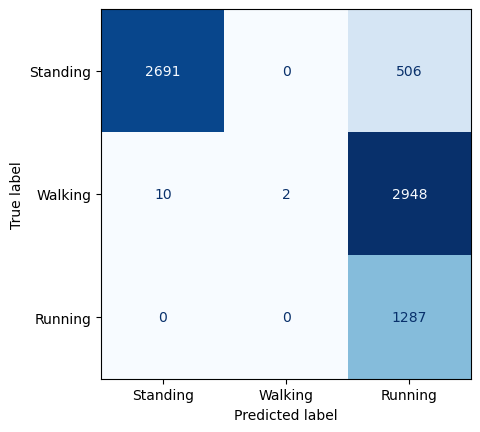

In [4]:
confusion_matrix = metrics.confusion_matrix(y_test, predLabels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, 
                                            display_labels = ['Standing', 'Walking', 'Running'])
cm_display.plot(cmap = plt.cm.Blues, colorbar = False)
plt.show()

In [5]:
print("Accuracy:", accuracy_score(y_test, predLabels))
print("Classification Report:\n", classification_report(y_test, predLabels))

Accuracy: 0.5346587855991403
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.84      0.91      3197
           1       1.00      0.00      0.00      2960
           2       0.27      1.00      0.43      1287

    accuracy                           0.53      7444
   macro avg       0.76      0.61      0.45      7444
weighted avg       0.87      0.53      0.47      7444

